In [30]:
import cv2
import matplotlib.pyplot as plt
import pytesseract
import numpy as np
import math
path=r'D:/Study/Python/openCV/College/res/'

pytesseract.pytesseract.tesseract_cmd = r'C:/Program Files/Tesseract-OCR/tesseract.exe'

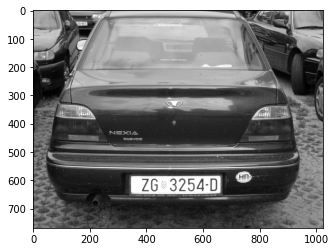

In [31]:
full_image=cv2.imread(path+'car0.jpg')
gray_image=cv2.cvtColor(full_image,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image,'gray')

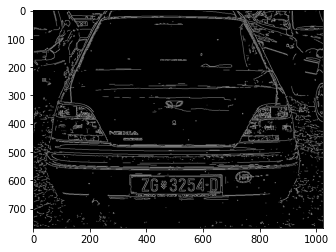

In [32]:
# Canny edge detection
edges_in_image=cv2.Canny(full_image,170,200)

# Finding contours from edged image
contours, new=cv2.findContours(edges_in_image.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

#Sorting the contours by area, >30
contours=sorted(contours,key=cv2.contourArea, reverse=True)[:30]

plt.imshow(edges_in_image,'gray')

In [33]:
# Initiaziling license plate area
contour_license_plate=None
license_plate=None
x=None
y=None
w=None
h=None

In [34]:
# Looping through contours to find the one with 4 corners
for contour in contours:
    perimeter=cv2.arcLength(contour,True)
    approx=cv2.approxPolyDP(contour,0.01*perimeter,True)
    if len(approx)==4:
        contour_license_plate=approx
        x,y,w,h=cv2.boundingRect(contour)
        license_plate=gray_image[y:y+h, x:x+w]
        break

In [35]:
license_plate=cv2.bilateralFilter(license_plate,11,17,17)
thresh,license_plate=cv2.threshold(license_plate,150,180,cv2.THRESH_BINARY)

text=pytesseract.image_to_string(license_plate)

image=cv2.rectangle(full_image,(x,y),(x+w,y+h),(0,0,255),3)
image=cv2.putText(full_image,text,(x-100,y-50),cv2.FONT_HERSHEY_COMPLEX,3,(0,255,0),6,cv2.LINE_AA)

print("License Plate Number is: ",text)

cv2.imshow("License Plate Recognition",image)
cv2.waitKey(0)

License Plate Number is:  


-1